# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons
Note: we set max_iter and tol explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


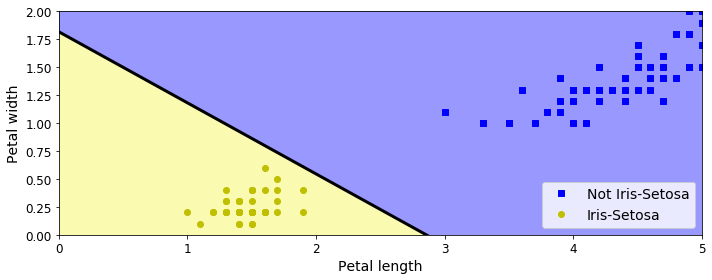

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


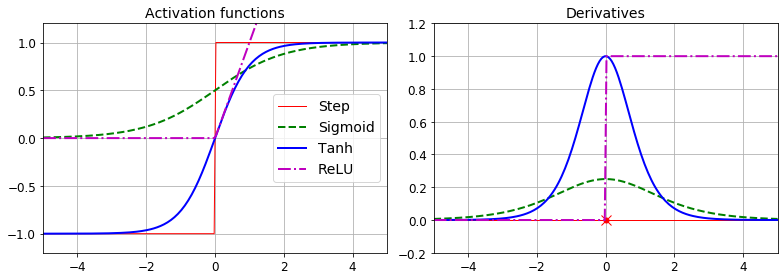

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

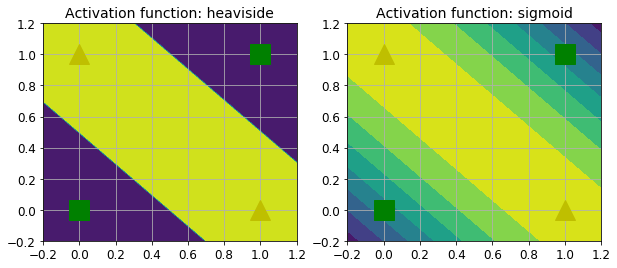

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST
Using the Estimator API (formerly tf.contrib.learn)

In [9]:
import tensorflow as tf

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [11]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/jk/6t403khj0pq4n26x_blvn3200000gn/T/tmpw4vcfurs', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa528609208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. 

INFO:tensorflow:global_step/sec: 846.296
INFO:tensorflow:loss = 0.21304469, step = 3901 (0.118 sec)
INFO:tensorflow:global_step/sec: 885.786
INFO:tensorflow:loss = 3.552253, step = 4001 (0.113 sec)
INFO:tensorflow:global_step/sec: 880.855
INFO:tensorflow:loss = 2.4011838, step = 4101 (0.114 sec)
INFO:tensorflow:global_step/sec: 880.313
INFO:tensorflow:loss = 1.5903873, step = 4201 (0.114 sec)
INFO:tensorflow:global_step/sec: 884.337
INFO:tensorflow:loss = 1.0289295, step = 4301 (0.113 sec)
INFO:tensorflow:global_step/sec: 836.821
INFO:tensorflow:loss = 11.849348, step = 4401 (0.120 sec)
INFO:tensorflow:global_step/sec: 850.666
INFO:tensorflow:loss = 1.3903103, step = 4501 (0.117 sec)
INFO:tensorflow:global_step/sec: 883.43
INFO:tensorflow:loss = 2.3465018, step = 4601 (0.113 sec)
INFO:tensorflow:global_step/sec: 884.917
INFO:tensorflow:loss = 1.3451357, step = 4701 (0.113 sec)
INFO:tensorflow:global_step/sec: 884.628
INFO:tensorflow:loss = 0.9077575, step = 4801 (0.113 sec)
INFO:tensor

INFO:tensorflow:loss = 0.04555066, step = 12101 (0.123 sec)
INFO:tensorflow:global_step/sec: 895.647
INFO:tensorflow:loss = 0.20338437, step = 12201 (0.111 sec)
INFO:tensorflow:global_step/sec: 902.958
INFO:tensorflow:loss = 0.23222844, step = 12301 (0.111 sec)
INFO:tensorflow:global_step/sec: 900.618
INFO:tensorflow:loss = 0.09732544, step = 12401 (0.111 sec)
INFO:tensorflow:global_step/sec: 879.726
INFO:tensorflow:loss = 0.12480996, step = 12501 (0.114 sec)
INFO:tensorflow:global_step/sec: 874.261
INFO:tensorflow:loss = 0.59963137, step = 12601 (0.114 sec)
INFO:tensorflow:global_step/sec: 890.83
INFO:tensorflow:loss = 0.14760059, step = 12701 (0.112 sec)
INFO:tensorflow:global_step/sec: 881.686
INFO:tensorflow:loss = 0.090338856, step = 12801 (0.114 sec)
INFO:tensorflow:global_step/sec: 879.298
INFO:tensorflow:loss = 1.8460191, step = 12901 (0.114 sec)
INFO:tensorflow:global_step/sec: 888.456
INFO:tensorflow:loss = 0.099900916, step = 13001 (0.113 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 808.075
INFO:tensorflow:loss = 0.022910995, step = 20301 (0.124 sec)
INFO:tensorflow:global_step/sec: 818.257
INFO:tensorflow:loss = 0.049271315, step = 20401 (0.122 sec)
INFO:tensorflow:global_step/sec: 763.842
INFO:tensorflow:loss = 0.01790555, step = 20501 (0.131 sec)
INFO:tensorflow:global_step/sec: 614.243
INFO:tensorflow:loss = 0.014701457, step = 20601 (0.163 sec)
INFO:tensorflow:global_step/sec: 792.136
INFO:tensorflow:loss = 0.07673328, step = 20701 (0.126 sec)
INFO:tensorflow:global_step/sec: 811.998
INFO:tensorflow:loss = 0.11465446, step = 20801 (0.123 sec)
INFO:tensorflow:global_step/sec: 801.713
INFO:tensorflow:loss = 0.043834403, step = 20901 (0.124 sec)
INFO:tensorflow:global_step/sec: 808.845
INFO:tensorflow:loss = 0.028688911, step = 21001 (0.124 sec)
INFO:tensorflow:global_step/sec: 814.034
INFO:tensorflow:loss = 0.141982, step = 21101 (0.123 sec)
INFO:tensorflow:global_step/sec: 719.503
INFO:tensorflow:loss = 0.11058335, step = 21201

INFO:tensorflow:global_step/sec: 775.946
INFO:tensorflow:loss = 0.04114531, step = 28401 (0.129 sec)
INFO:tensorflow:global_step/sec: 753.62
INFO:tensorflow:loss = 0.052826136, step = 28501 (0.133 sec)
INFO:tensorflow:global_step/sec: 728.591
INFO:tensorflow:loss = 0.045738917, step = 28601 (0.137 sec)
INFO:tensorflow:global_step/sec: 760.746
INFO:tensorflow:loss = 0.013776176, step = 28701 (0.132 sec)
INFO:tensorflow:global_step/sec: 777.992
INFO:tensorflow:loss = 0.009538332, step = 28801 (0.129 sec)
INFO:tensorflow:global_step/sec: 778.167
INFO:tensorflow:loss = 0.06433005, step = 28901 (0.128 sec)
INFO:tensorflow:global_step/sec: 778.587
INFO:tensorflow:loss = 0.022077493, step = 29001 (0.128 sec)
INFO:tensorflow:global_step/sec: 775.012
INFO:tensorflow:loss = 0.01717075, step = 29101 (0.129 sec)
INFO:tensorflow:global_step/sec: 774.03
INFO:tensorflow:loss = 0.035343498, step = 29201 (0.129 sec)
INFO:tensorflow:global_step/sec: 766.424
INFO:tensorflow:loss = 0.029035132, step = 293

INFO:tensorflow:global_step/sec: 716.236
INFO:tensorflow:loss = 0.04671519, step = 36501 (0.140 sec)
INFO:tensorflow:global_step/sec: 733.573
INFO:tensorflow:loss = 0.033637915, step = 36601 (0.136 sec)
INFO:tensorflow:global_step/sec: 757.387
INFO:tensorflow:loss = 0.05191979, step = 36701 (0.132 sec)
INFO:tensorflow:global_step/sec: 731.63
INFO:tensorflow:loss = 0.087280765, step = 36801 (0.137 sec)
INFO:tensorflow:global_step/sec: 741.752
INFO:tensorflow:loss = 0.022353683, step = 36901 (0.135 sec)
INFO:tensorflow:global_step/sec: 733.859
INFO:tensorflow:loss = 0.0072754757, step = 37001 (0.136 sec)
INFO:tensorflow:global_step/sec: 730.262
INFO:tensorflow:loss = 0.013748586, step = 37101 (0.137 sec)
INFO:tensorflow:global_step/sec: 713.481
INFO:tensorflow:loss = 0.029171474, step = 37201 (0.140 sec)
INFO:tensorflow:global_step/sec: 738.969
INFO:tensorflow:loss = 0.0143129965, step = 37301 (0.135 sec)
INFO:tensorflow:global_step/sec: 744.979
INFO:tensorflow:loss = 0.0055621653, step 

In [12]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-22T11:44:56Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/jk/6t403khj0pq4n26x_blvn3200000gn/T/tmpw4vcfurs/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-22-11:44:57
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9793, average_loss = 0.106278464, global_step = 44000, loss = 13.4529705
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /var/folders/jk/6t403khj0pq4n26x_blvn3200000gn/T/tmpw4vcfurs/model.ckpt-44000


In [13]:
eval_results

{'accuracy': 0.9793,
 'average_loss': 0.106278464,
 'loss': 13.4529705,
 'global_step': 44000}

In [14]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/jk/6t403khj0pq4n26x_blvn3200000gn/T/tmpw4vcfurs/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -1.6508802,  -3.2693486,  -4.0859   ,   9.742059 , -10.372033 ,
         -3.2991776,  -7.9958673,  21.062101 ,  -2.6785767,   4.080781 ],
       dtype=float32),
 'probabilities': array([1.3673254e-10, 2.7100697e-11, 1.1977240e-11, 1.2127260e-05,
        2.2300939e-14, 2.6304249e-11, 2.4003773e-13, 9.9998784e-01,
        4.8927040e-11, 4.2179497e-08], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

# Using plain TensorFlow

In [15]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [16]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [17]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [18]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [19]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [20]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [21]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [22]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [23]:
n_epochs = 40
batch_size = 50

In [24]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [25]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9148
1 Batch accuracy: 0.92 Val accuracy: 0.9358
2 Batch accuracy: 0.96 Val accuracy: 0.945
3 Batch accuracy: 0.92 Val accuracy: 0.951
4 Batch accuracy: 0.98 Val accuracy: 0.9558
5 Batch accuracy: 0.96 Val accuracy: 0.9566
6 Batch accuracy: 1.0 Val accuracy: 0.9614
7 Batch accuracy: 0.94 Val accuracy: 0.963
8 Batch accuracy: 0.98 Val accuracy: 0.9652
9 Batch accuracy: 0.96 Val accuracy: 0.966
10 Batch accuracy: 0.92 Val accuracy: 0.9684
11 Batch accuracy: 0.98 Val accuracy: 0.9692
12 Batch accuracy: 0.98 Val accuracy: 0.9674
13 Batch accuracy: 0.98 Val accuracy: 0.9706
14 Batch accuracy: 1.0 Val accuracy: 0.9712
15 Batch accuracy: 0.94 Val accuracy: 0.9734
16 Batch accuracy: 1.0 Val accuracy: 0.9736
17 Batch accuracy: 1.0 Val accuracy: 0.9742
18 Batch accuracy: 1.0 Val accuracy: 0.9746
19 Batch accuracy: 0.98 Val accuracy: 0.9748
20 Batch accuracy: 1.0 Val accuracy: 0.9754
21 Batch accuracy: 1.0 Val accuracy: 0.9758
22 Batch accuracy: 0.98 Val accu

In [26]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [27]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


# Using dense() instead of neuron_layer()
Note: previous releases of the book used tensorflow.contrib.layers.fully_connected() rather than tf.layers.dense() (which did not exist when this chapter was written). It is now preferable to use tf.layers.dense(), because anything in the contrib module may change or be deleted without notice. The dense() function is almost identical to the fully_connected() function, except for a few minor differences:

several parameters are renamed: scope becomes name, activation_fn becomes activation (and similarly the _fn suffix is removed from other parameters such as normalizer_fn), weights_initializer becomes kernel_initializer, etc.
the default activation is now None rather than tf.nn.relu.
a few more differences are presented in chapter 11.

In [28]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [29]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [30]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.dense instead.


In [31]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [32]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [33]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [34]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [35]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9512
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.9622
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9658
11 Batch accuracy: 0.98 Validation accuracy: 0.9666
12 Batch accuracy: 0.98 Validation accuracy: 0.9684
13 Batch accuracy: 0.98 Validation accuracy: 0.9702
14 Batch accuracy: 1.0 Validation accuracy: 0.9696
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.9728
17 Batch accuracy: 1.0 Validation accuracy: 0.973
18 Batch accuracy: 0.98 Validation accuracy: 0.9746
19 Batch accuracy: 0.98 Valid